# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime 
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [95]:
#City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
#city_results = []
#Index_cities=[]

City_Number = []
City_Name = []
City_Lat = []
City_Lng = []
City_MaxTemp = []
City_Humidity = []
City_Cloudiness = []
City_WindSpeed = []
City_Country = []
City_Date = []
Count_Record = 0
#for city in cities:   

weather_api_key= "a160fd00bbc7c7caddb54e2757ff85b2"
city_ejempo=['London','Melbourne', 'Alaska','Jazan','Caracas', 'El Junquito', 'New Orleans', "GTY77", "Maracay", "Washington", "Pensilvanya", "Palita", "guarenas", "Atlanta", "Bogota"]

for city in city_ejempo:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    #print(url) 
    Req_weather_city = requests.get(url).json()
    if (Req_weather_city["cod"]==200):
        Count_Record = Count_Record + 1
        City_Number.append(Req_weather_city['id'])
        City_Name.append(Req_weather_city['name'])
        City_Lat.append(Req_weather_city['coord']['lat'])
        City_Lng.append(Req_weather_city['coord']['lon'])
        City_MaxTemp.append(Req_weather_city['main']['temp'])
        City_Humidity.append(Req_weather_city['main']['humidity'])
        City_Cloudiness.append(Req_weather_city['clouds']['all'])
        City_WindSpeed.append(Req_weather_city['wind']['speed'])
        City_Country.append(Req_weather_city['sys']['country'])
        City_Date.append(Req_weather_city['dt'])
        print(f"Processing Record {Count_Record} of Set 1 |City number: {Req_weather_city['id']}, City name {Req_weather_city['name']}")
    else: 
        #{"cod":"404","message":"city not found"}
        print(f"{city}: {Req_weather_city['message']}. Skipping...")

weather_dict = {
    "City": City_Name,
    "Lat": City_Lat,
    "Lng":City_Lng,
    "Temp": City_MaxTemp,
    "Humidity":City_Humidity,
    "Cloudiness":City_Cloudiness,
    "Wind Speed":City_WindSpeed,
    "Country":City_Country,
    "Date":City_Date 
}
meteorology_cities = pd.DataFrame(weather_dict)


Processing Record 1 of Set 1 |City number: 2643743, City name London
Processing Record 2 of Set 1 |City number: 4163971, City name Melbourne
Processing Record 3 of Set 1 |City number: 5879092, City name Alaska
Processing Record 4 of Set 1 |City number: 138025, City name Jazan
Processing Record 5 of Set 1 |City number: 3646738, City name Caracas
Processing Record 6 of Set 1 |City number: 3646190, City name El Junquito
Processing Record 7 of Set 1 |City number: 4335045, City name New Orleans
GTY77: city not found. Skipping...
Processing Record 8 of Set 1 |City number: 3632998, City name Maracay
Processing Record 9 of Set 1 |City number: 5815135, City name Washington
Processing Record 10 of Set 1 |City number: 6254927, City name Pennsylvania
Palita: city not found. Skipping...
Processing Record 11 of Set 1 |City number: 3640049, City name Guarenas
Processing Record 12 of Set 1 |City number: 4180439, City name Atlanta
Processing Record 13 of Set 1 |City number: 3688689, City name Bogotá


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:
# Export the city data into a .csv.
meteorology_cities.to_csv("output_data/meteorology_of_cities.csv", index=False, header=True)
# Display the DataFrame
for date_ in meteorology_cities['Date']:
    meteorology_cities['Date'] = datetime.fromtimestamp(date_).strftime('%m/%d/%Y')
meteorology_cities

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,London,51.5085,-0.1257,46.02,87,90,3.44,GB,02/06/2021
1,Melbourne,28.0836,-80.6081,62.02,88,90,4.61,US,02/06/2021
2,Alaska,64.0003,-150.0003,-1.88,94,100,0.98,US,02/06/2021
3,Jazan,36.2105,54.3928,50.29,65,100,5.91,IR,02/06/2021
4,Caracas,10.4880,-66.8792,72.34,74,20,3.65,VE,02/06/2021
5,El Junquito,10.4614,-67.0806,73.45,74,20,3.38,VE,02/06/2021
6,New Orleans,29.9547,-90.0751,52.21,93,90,9.22,US,02/06/2021
7,Maracay,10.2469,-67.5958,77.00,78,20,0.29,VE,02/06/2021
8,Washington,47.5001,-120.5015,36.45,51,0,5.01,US,02/06/2021
9,Pennsylvania,40.2724,-76.9057,33.03,48,1,4.61,US,02/06/2021


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [73]:
Weather_cities_statistic = meteorology_cities.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
Weather_cities_statistic

,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,29.04250,-68.496577,51.351538,77.000000,51.230769,4.426154
std,18.82738,50.082860,22.110515,15.099669,39.797726,2.251028
min,4.60970,-150.000300,-1.880000,48.000000,0.000000,0.290000
25%,10.46740,-84.388000,36.450000,74.000000,20.000000,3.440000
50%,29.95470,-74.081700,52.210000,78.000000,40.000000,4.610000
75%,40.27240,-66.879200,72.340000,88.000000,90.000000,5.590000
max,64.00030,54.392800,77.000000,94.000000,100.000000,9.220000


In [74]:
#  Get the indices of cities that have humidity over 100%
#city_Hum100 =  meteorology_cities.index[meteorology_cities['Humidity'] >= 100 ].tolist()
city_Hum100 = meteorology_cities[(meteorology_cities['Humidity'] > 100)]
a = 5
b=10
if len(city_Hum100) == 0:
    clean_city_data = meteorology_cities.copy()
    print(f"Skip this step if there are no cities that have humidity > 100%.")
    print(city_Hum100.index)
else:
    clean_city_data = meteorology_cities[(meteorology_cities['Humidity'] < 100)]
    clean_city_data_statistic = clean_city_data.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
    print(f"Indices of cities that have humidity over 100%.: {city_Hum100.index}")
    print(f"=========================================================================")
    print(f"{clean_city_data_statistic}")

Skip this step if there are no cities that have humidity > 100%.
Int64Index([], dtype='int64')


In [75]:
#which we call "clean_city_data"
clean_city_data

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,London,51.5085,-0.1257,46.02,87,90,3.44,GB,02/06/2021
1,Melbourne,28.0836,-80.6081,62.02,88,90,4.61,US,02/06/2021
2,Alaska,64.0003,-150.0003,-1.88,94,100,0.98,US,02/06/2021
3,Jazan,36.2105,54.3928,50.29,65,100,5.91,IR,02/06/2021
4,Caracas,10.4880,-66.8792,72.34,74,20,3.65,VE,02/06/2021
5,El Junquito,10.4614,-67.0806,73.45,74,20,3.38,VE,02/06/2021
6,New Orleans,29.9547,-90.0751,52.21,93,90,9.22,US,02/06/2021
7,Maracay,10.2469,-67.5958,77.00,78,20,0.29,VE,02/06/2021
8,Washington,47.5001,-120.5015,36.45,51,0,5.01,US,02/06/2021
9,Pennsylvania,40.2724,-76.9057,33.03,48,1,4.61,US,02/06/2021


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

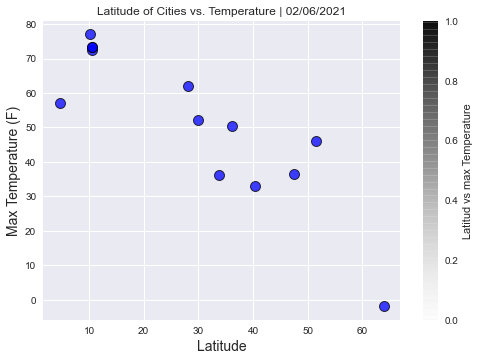

In [79]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Temp']
plt.scatter(x,y, s=100, c='blue', edgecolor='black', linewidth=1, alpha=0.75);
plt.title(f"Latitude of Cities vs. Temperature | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Max Temperature (F)", fontsize="14")
cbar= plt.colorbar()
cbar.set_label('Latitud vs max Temperature')

## Latitude vs. Humidity Plot

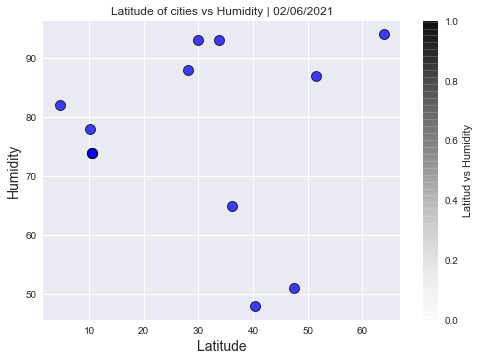

In [80]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Humidity']
plt.scatter(x,y, s=100, c='blue', edgecolor='black', linewidth=1, alpha=0.75);
plt.title(f"Latitude of cities vs Humidity | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Humidity", fontsize="14")
cbar= plt.colorbar()
cbar.set_label('Latitud vs Humidity')

## Latitude vs. Cloudiness Plot

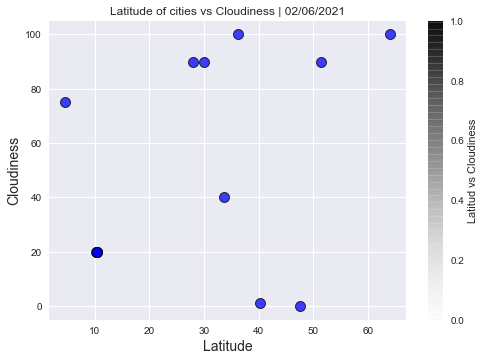

In [81]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Cloudiness']
plt.scatter(x,y, s=100, c='blue', edgecolor='black', linewidth=1, alpha=0.75);
plt.title(f"Latitude of cities vs Cloudiness | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Cloudiness", fontsize="14")
cbar= plt.colorbar()
cbar.set_label('Latitud vs Cloudiness')

## Latitude vs. Wind Speed Plot

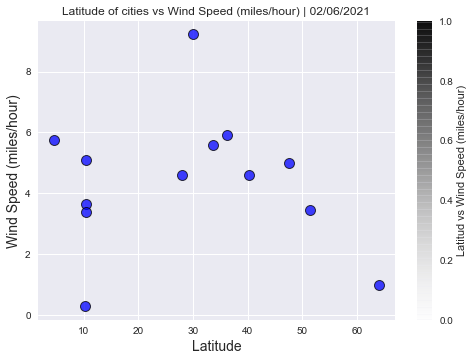

In [84]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Wind Speed']
plt.scatter(x,y, s=100, c='blue', edgecolor='black', linewidth=1, alpha=0.75);
plt.title(f"Latitude of cities vs Wind Speed (miles/hour) | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Wind Speed (miles/hour)", fontsize="14")
cbar= plt.colorbar()
cbar.set_label('Latitud vs Wind Speed (miles/hour)')

## Linear Regression

In [91]:
#Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
print(f"the intercept :{round(intercept,2)}");
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Lat linear regression model :{line_eq}");
#plt.scatter(X,Y, s=100, c="#000023", alpha=0.9, linewidths=1, edgecolors="black", sizes=sizes, cmap="viridis")
#plt.plot(x,regress_values,"r-");


the intercept :4.72
Lat linear regression model :y = -0.01x + 4.72


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Northern Hemisphere = Latitude between 0 ° and 90 °: Northern Hemisphere


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Southern Hemisphere = Latitude between 0 ° and -90 °: Southern Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression